About Dataset
Context
The Affordable Care Act (ACA) is the name for the comprehensive health care reform law and its amendments which addresses health insurance coverage, health care costs, and preventive care. The law was enacted in two parts: The Patient Protection and Affordable Care Act was signed into law on March 23, 2010 by President Barack Obama and was amended by the Health Care and Education Reconciliation Act on March 30, 2010.

Content
This dataset provides health insurance coverage data for each state and the nation as a whole, including variables such as the uninsured rates before and after Obamacare, estimates of individuals covered by employer and marketplace healthcare plans, and enrollment in Medicare and Medicaid programs.

Acknowledgements
The health insurance coverage data was compiled from the US Department of Health and Human Services and US Census Bureau.

Inspiration
How has the Affordable Care Act changed the rate of citizens with health insurance coverage? Which states observed the greatest decline in their uninsured rate? Did those states expand Medicaid program coverage and/or implement a health insurance marketplace? What do you predict will happen to the nationwide uninsured rate in the next five years?

In [51]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv(r'C:\Users\wania_96\Desktop\states.csv')
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [53]:
df.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

In [54]:
df.shape

(52, 14)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [56]:
#df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
#df['Age'] = df['Age'].fillna(df['Age'].mean())
df['State Medicaid Expansion (2016)']=df['State Medicaid Expansion (2016)'].fillna(df['State Medicaid Expansion (2016)'].mode()[0])

In [57]:
df['Medicaid Enrollment (2013)']=df['Medicaid Enrollment (2013)'].fillna(df['Medicaid Enrollment (2013)'].mean())

In [58]:
df['Medicaid Enrollment Change (2013-2016)']=df['Medicaid Enrollment Change (2013-2016)'].fillna(df['Medicaid Enrollment Change (2013-2016)'].mean())

In [59]:
df.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

In [60]:
df['Uninsured Rate (2010)']=df['Uninsured Rate (2010)'].str.strip("%").astype(float)
df['Uninsured Rate (2015)']=df['Uninsured Rate (2015)'].str.strip("%").astype(float)
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [61]:
df['Uninsured Rate Change (2010-2015)']=df['Uninsured Rate Change (2010-2015)'].str.strip("% ")
df['Uninsured Rate Change (2010-2015)']=df['Uninsured Rate Change (2010-2015)'].str.replace('%', ' ')
df['Uninsured Rate Change (2010-2015)']=df['Uninsured Rate Change (2010-2015)'].astype(float)

In [62]:
df['Average Monthly Tax Credit (2016)']=df['Average Monthly Tax Credit (2016)'].str.strip("$").astype(float)

In [63]:
df['Medicaid Enrollment (2013)']=df['Medicaid Enrollment (2013)'].astype(float)
df['Medicaid Enrollment (2016)']=df['Medicaid Enrollment (2016)'].astype(float)

In [64]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,False,799176.0,910775.0,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,True,122334.0,166625.0,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,True,1201770.0,1716198.0,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,True,556851.0,920194.0,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081.0,4087700.0,5829777


In [65]:
df['State Medicaid Expansion (2016)'].replace('True', 1, inplace = True)
df['State Medicaid Expansion (2016)'].replace('False', 0, inplace = True)

In [68]:
df['State Medicaid Expansion (2016)']=df['State Medicaid Expansion (2016)'].astype(float)

In [72]:
df.dtypes

State                                            object
Uninsured Rate (2010)                           float64
Uninsured Rate (2015)                           float64
Uninsured Rate Change (2010-2015)               float64
Health Insurance Coverage Change (2010-2015)      int64
Employer Health Insurance Coverage (2015)         int64
Marketplace Health Insurance Coverage (2016)      int64
Marketplace Tax Credits (2016)                    int64
Average Monthly Tax Credit (2016)               float64
State Medicaid Expansion (2016)                 float64
Medicaid Enrollment (2013)                      float64
Medicaid Enrollment (2016)                      float64
Medicaid Enrollment Change (2013-2016)          float64
Medicare Enrollment (2016)                        int64
dtype: object

In [71]:
df['State']=df['State'].str.strip()
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,0.0,799176.0,910775.0,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,1.0,122334.0,166625.0,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,1.0,1201770.0,1716198.0,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,1.0,556851.0,920194.0,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,1.0,7755381.0,11843081.0,4087700.0,5829777


C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employer Health Insurance Coverage (2015)', ylabel='State'>

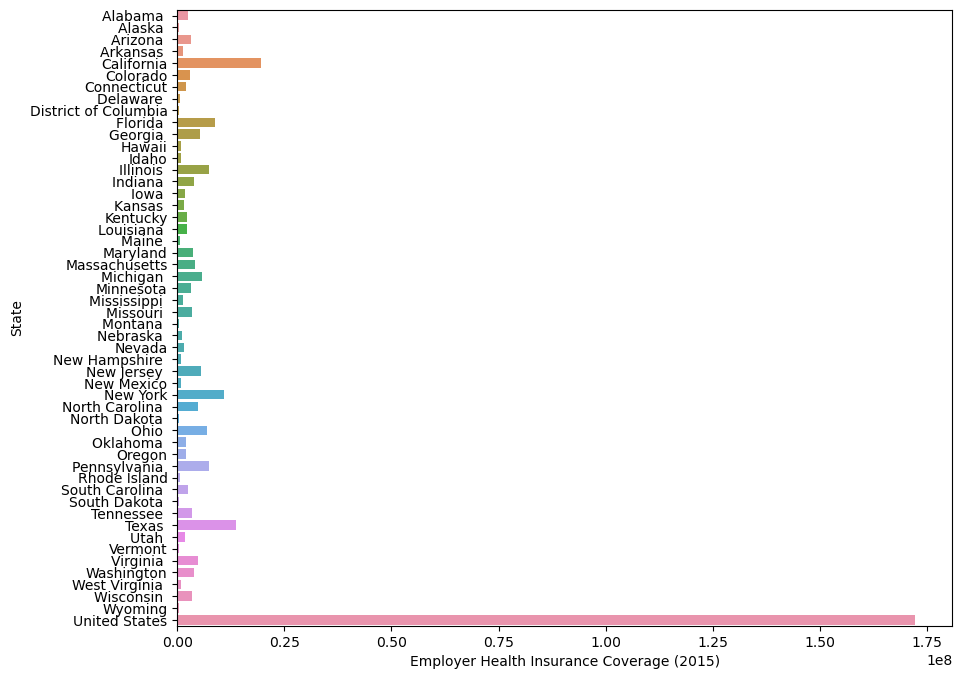

In [67]:
plt.figure(figsize = (10, 8))
sns.barplot('Employer Health Insurance Coverage (2015)','State', data = df)

C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Uninsured Rate Change (2010-2015)', ylabel='State'>

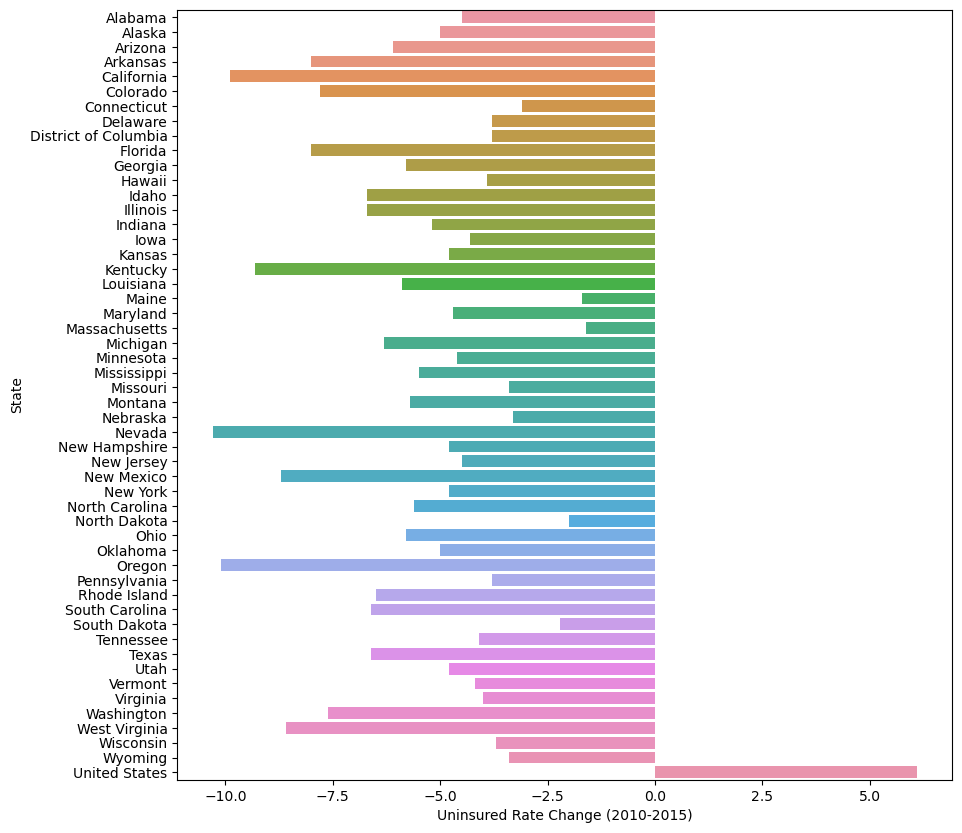

In [73]:
plt.figure(figsize = (10, 10))
sns.barplot('Uninsured Rate Change (2010-2015)', 'State', data = df)

C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employer Health Insurance Coverage (2015)', ylabel='State'>

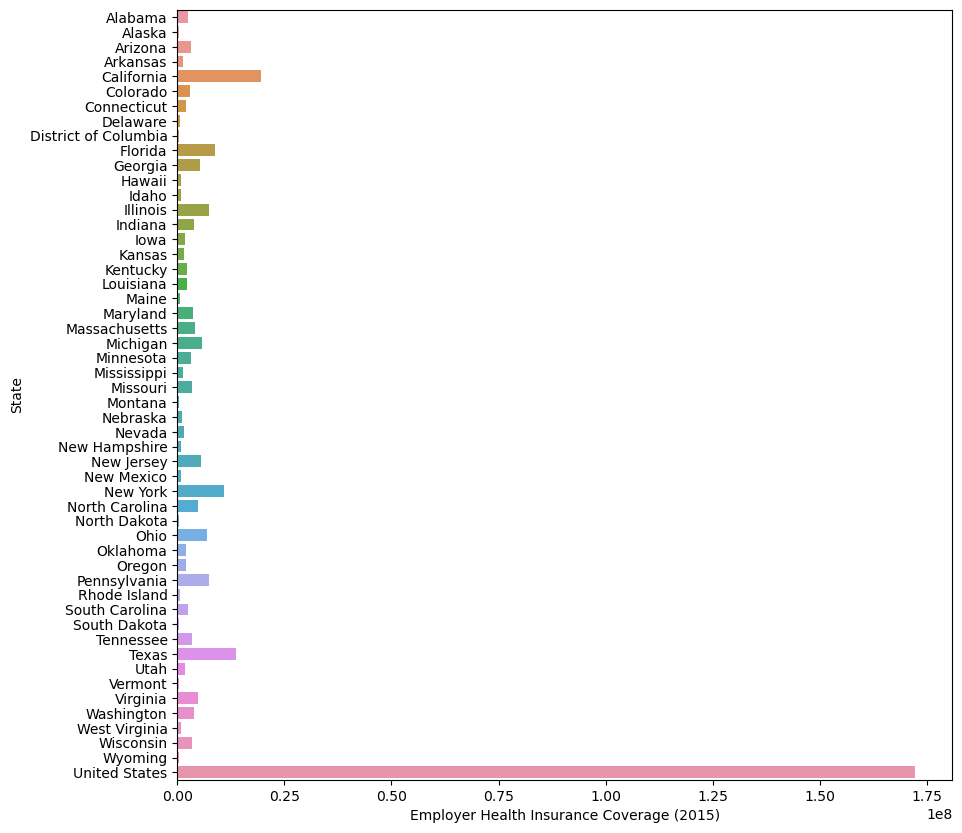

In [75]:
plt.figure(figsize = (10, 10))
sns.barplot('Employer Health Insurance Coverage (2015)','State', data = df)

C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1500x500 with 0 Axes>

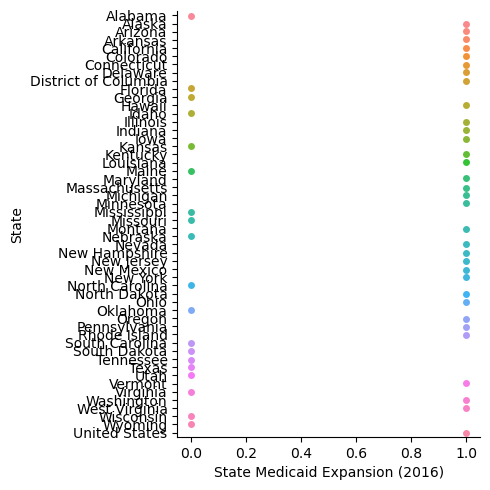

In [81]:
plt.figure(figsize = (15, 5))
sns.catplot('State Medicaid Expansion (2016)','State', data = df)

C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Uninsured Rate (2010)', ylabel='Uninsured Rate (2015)'>

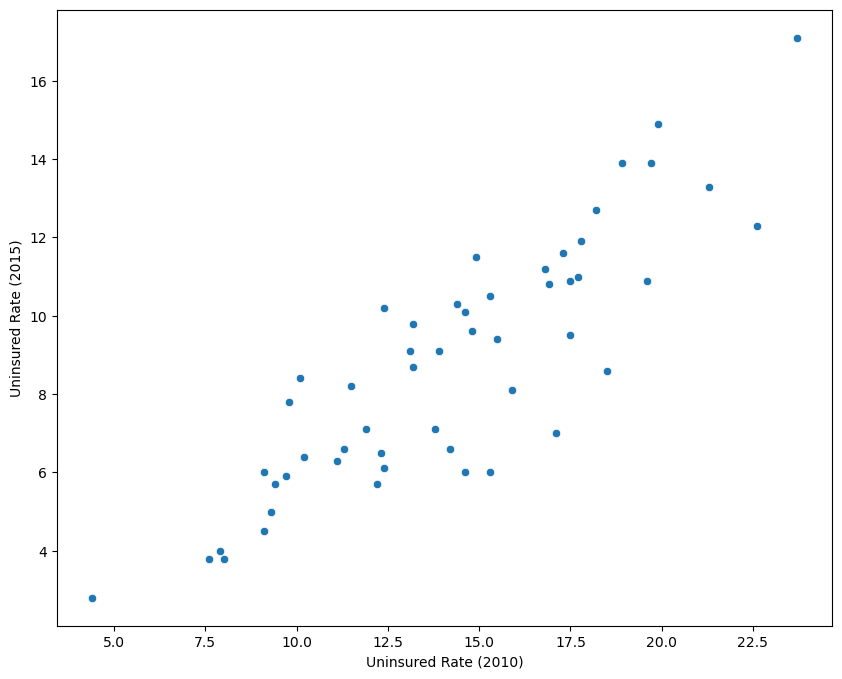

In [82]:
plt.figure(figsize = (10, 8))
sns.scatterplot('Uninsured Rate (2010)', 'Uninsured Rate (2015)', data = df)

C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Health Insurance Coverage Change (2010-2015)', ylabel='State'>

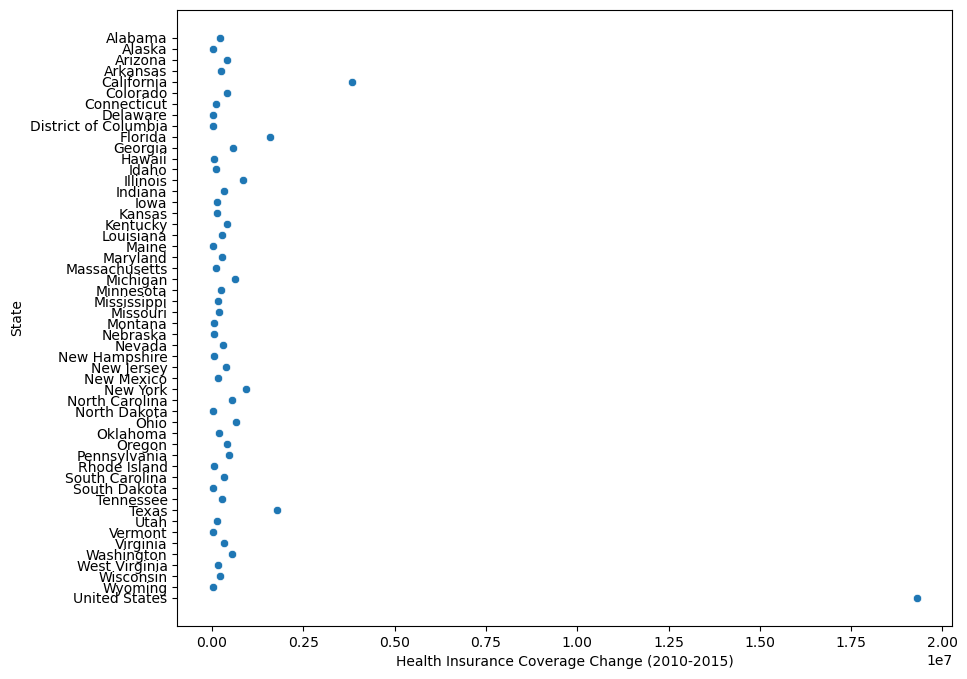

In [83]:
 
plt.figure(figsize = (10, 8))
sns.scatterplot('Health Insurance Coverage Change (2010-2015)','State', data = df)

C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketplace Health Insurance Coverage (2016)', ylabel='State'>

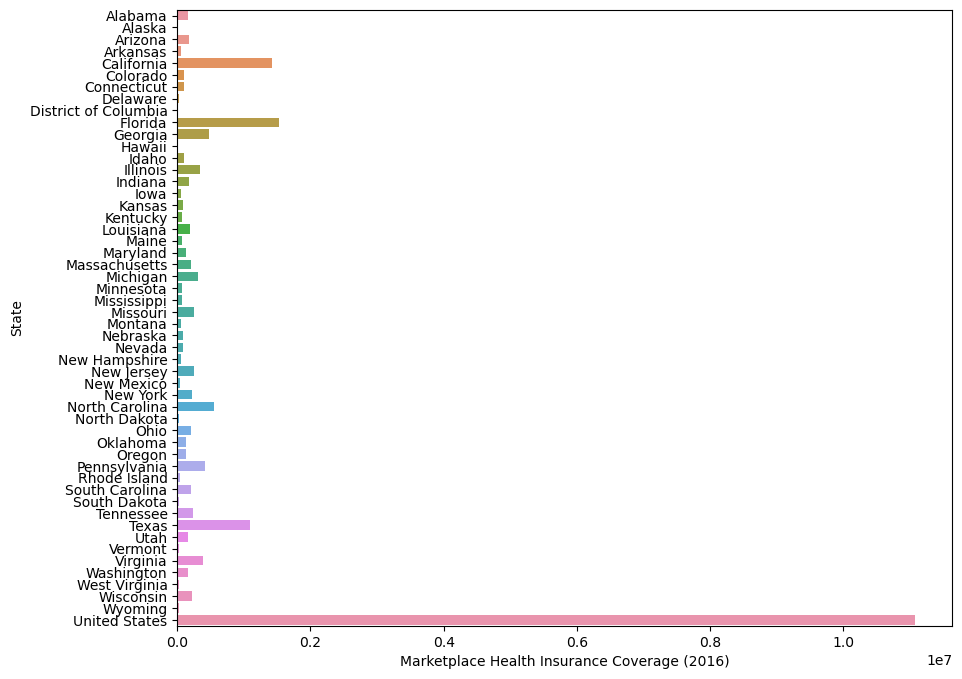

In [84]:
plt.figure(figsize = (10, 8))
sns.barplot('Marketplace Health Insurance Coverage (2016)','State', data = df)

C:\Users\wania_96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medicaid Enrollment Change (2013-2016)', ylabel='State'>

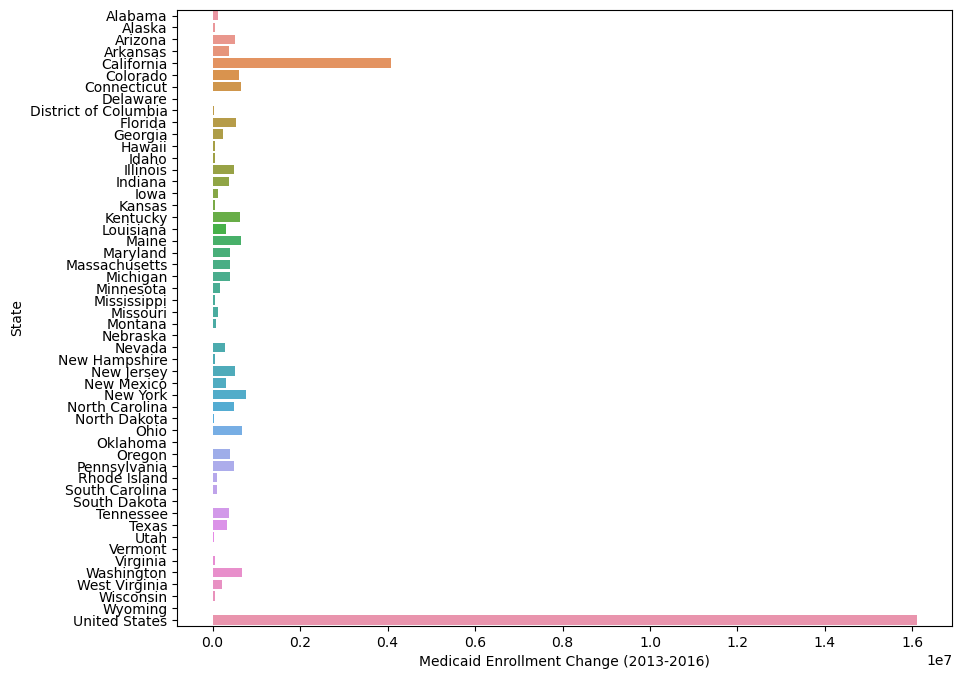

In [86]:
plt.figure(figsize = (10,8))
sns.barplot('Medicaid Enrollment Change (2013-2016)','State', data = df)

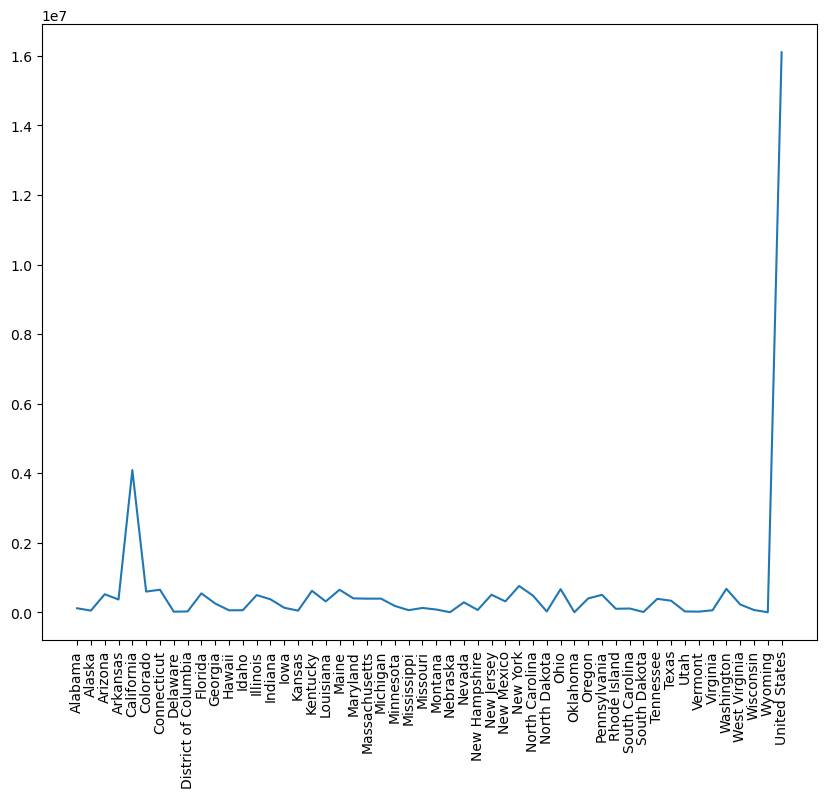

In [95]:
plt.figure(figsize = (10,8))
plt.plot('State','Medicaid Enrollment Change (2013-2016)' ,data = df)
plt.xticks(rotation='vertical')
plt.show()

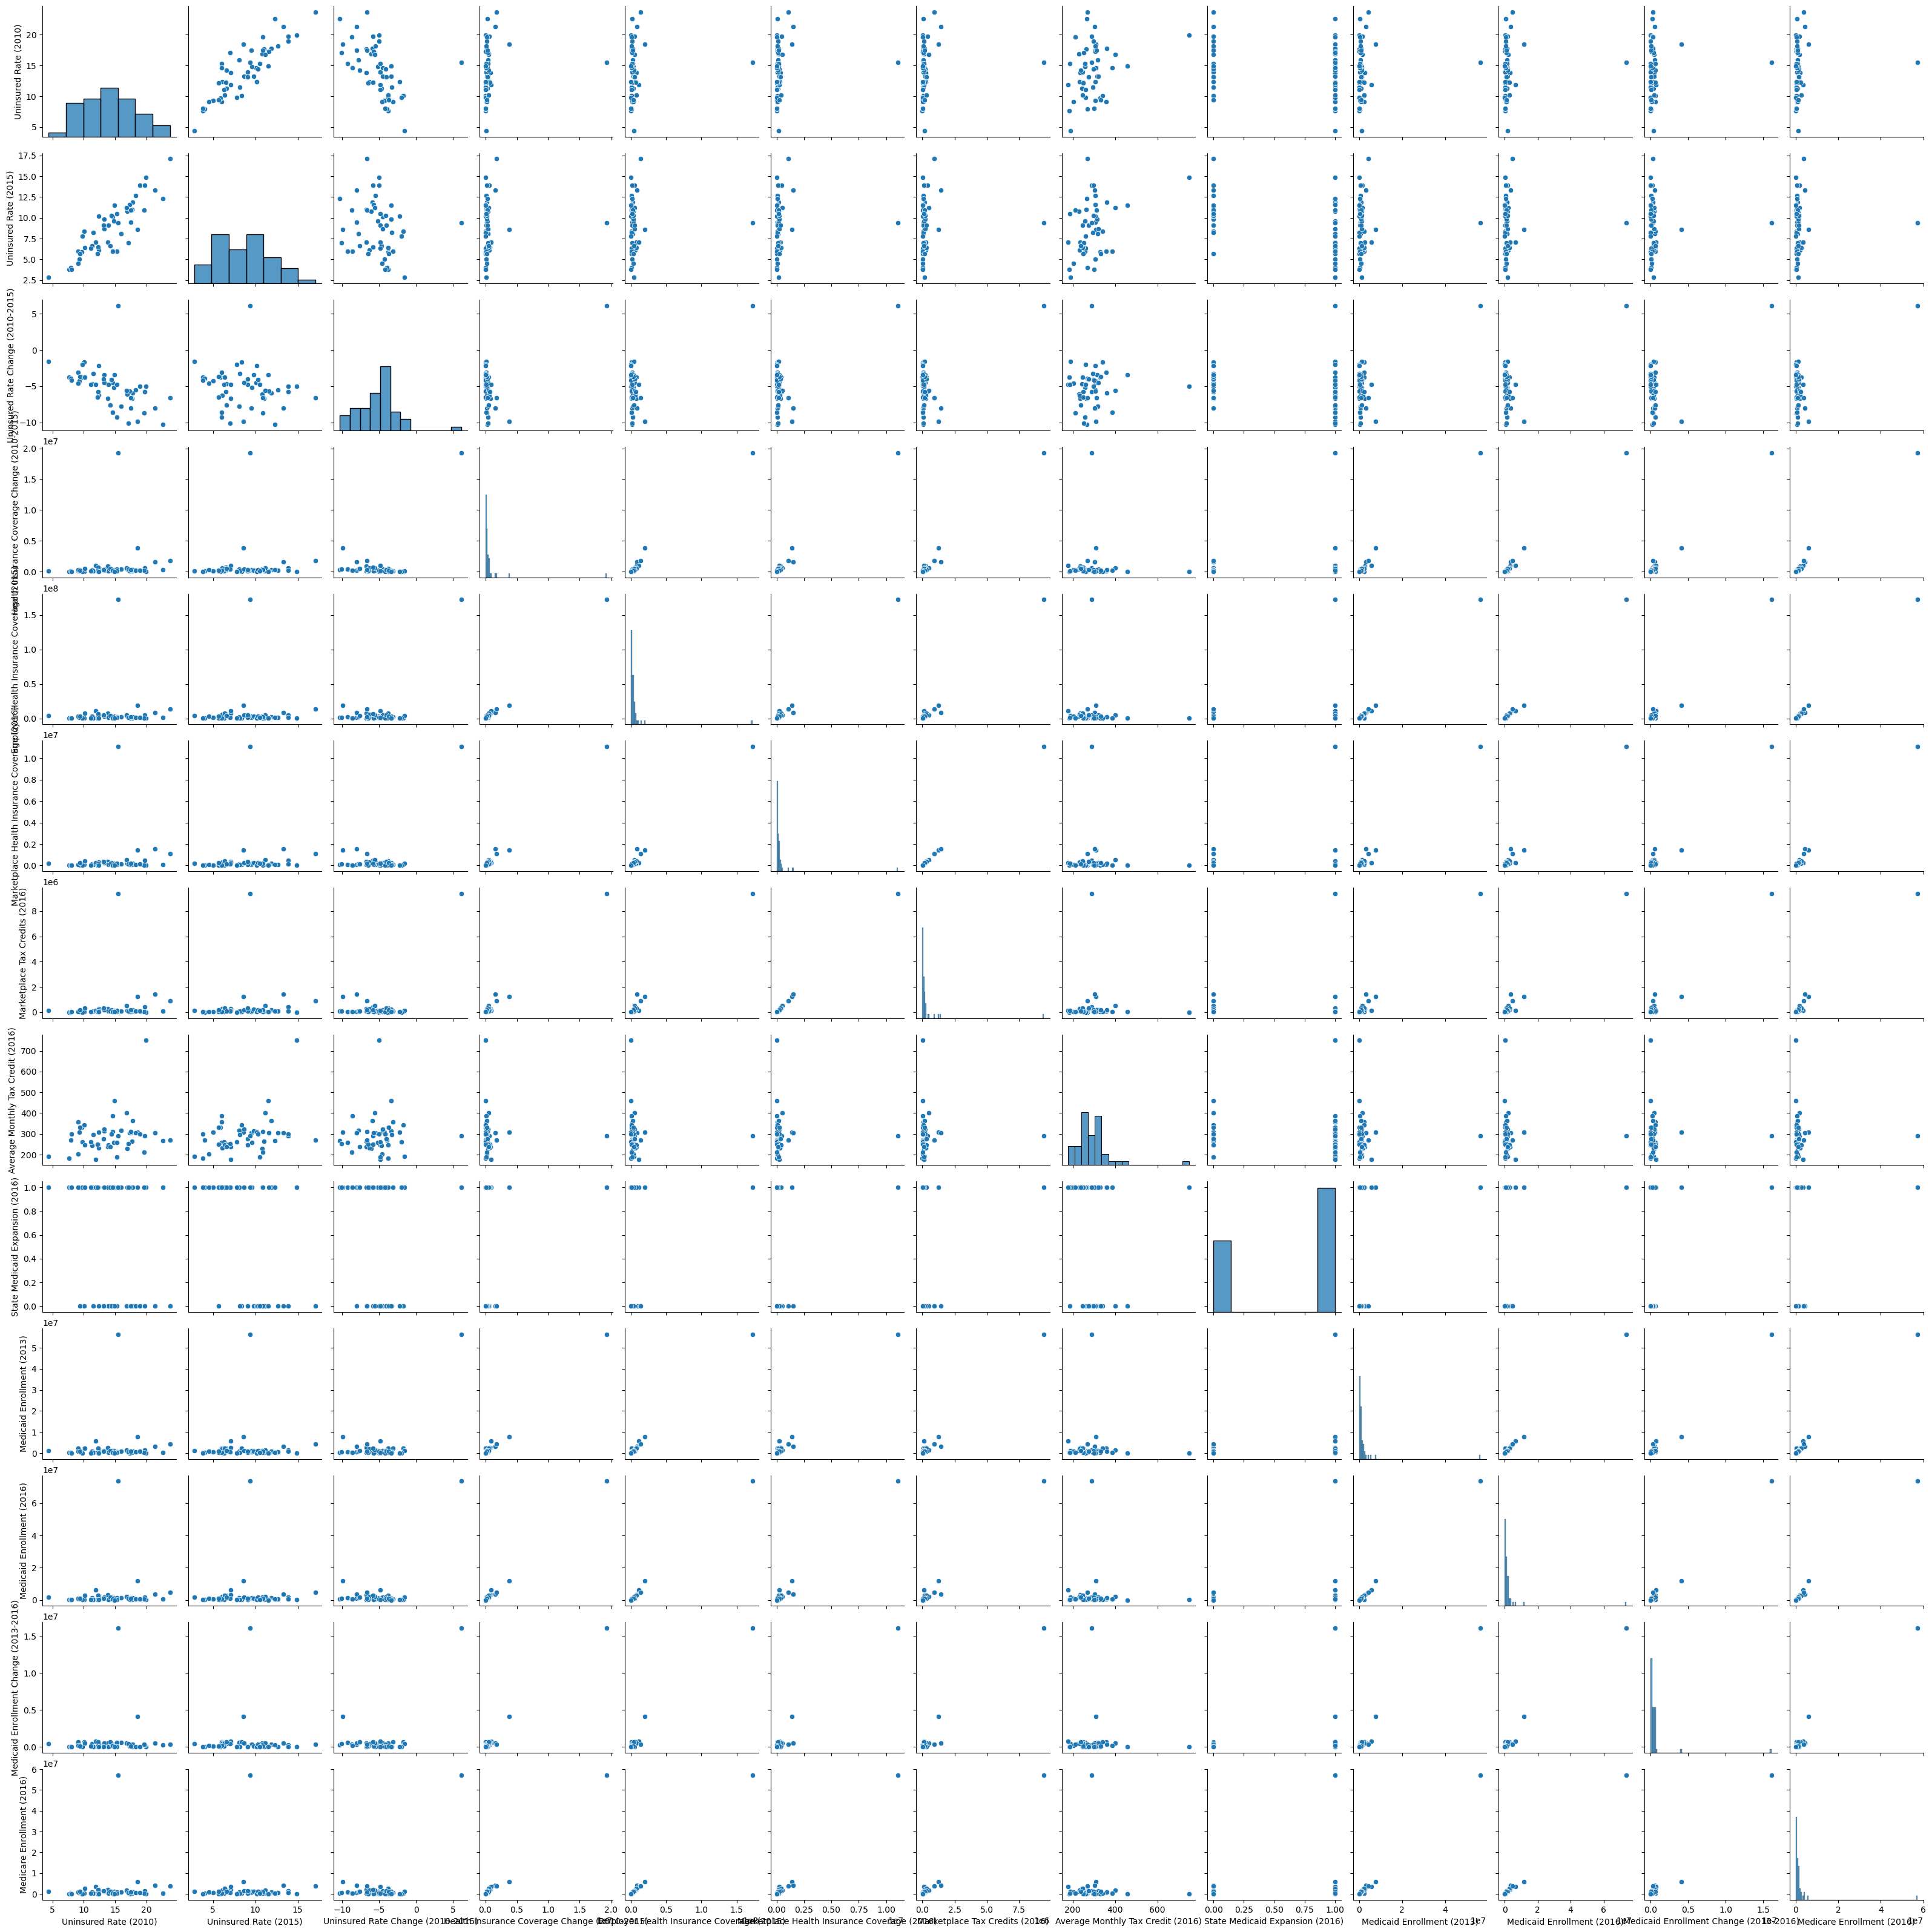

In [96]:
sns.pairplot(df)

#A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.